In [1]:
import pandas as pd
import numpy as np
from numpy.polynomial import Polynomial as P
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
import matplotlib.gridspec as gridspec
#import statsmodels.api as sm
import scipy.stats as stats
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
import re
#from visualization.plotters import gp_plot

In [115]:
df = pd.read_csv('../../GME.csv')

In [116]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-01-04,19.000000,19.100000,17.150000,17.250000,17.250000,10022500
1,2021-01-05,17.350000,18.080000,17.230000,17.370001,17.370001,4961500
2,2021-01-06,17.340000,18.980000,17.330000,18.360001,18.360001,6056200
3,2021-01-07,18.469999,19.450001,18.020000,18.080000,18.080000,6129300
4,2021-01-08,18.180000,18.299999,17.080000,17.690001,17.690001,6482000
...,...,...,...,...,...,...,...
156,2021-08-17,161.190002,169.479996,161.100006,163.550003,163.550003,1215900
157,2021-08-18,163.250000,165.600006,156.750000,157.050003,157.050003,1411800
158,2021-08-19,156.770004,157.990005,150.779999,152.899994,152.899994,1196500
159,2021-08-20,153.800003,160.089996,153.240005,159.300003,159.300003,1151700


<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

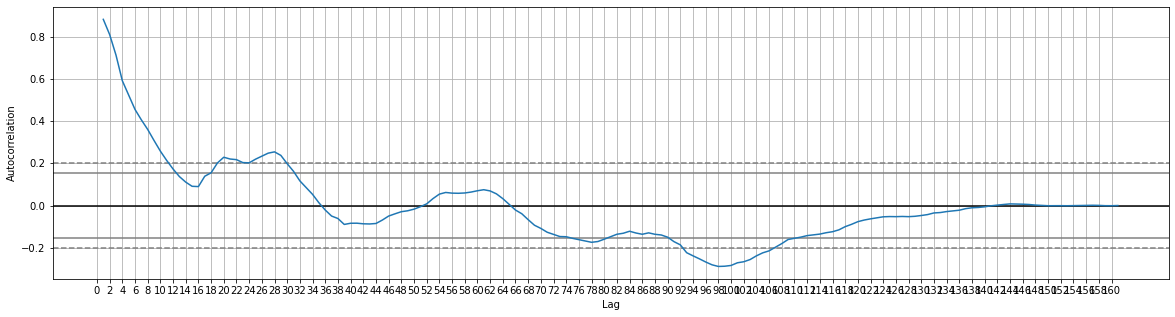

In [38]:
fig, ax = plt.subplots(figsize=(20, 5))
ax.xaxis.set_ticks(np.arange(0,df.Open.size, 2))
pd.plotting.autocorrelation_plot(df.Close, ax = ax)

In [107]:
diff = np.array([(1.00-df.Close[i]/df.Close[i-1]) for i in np.arange(1,df.Open.size,1)])

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

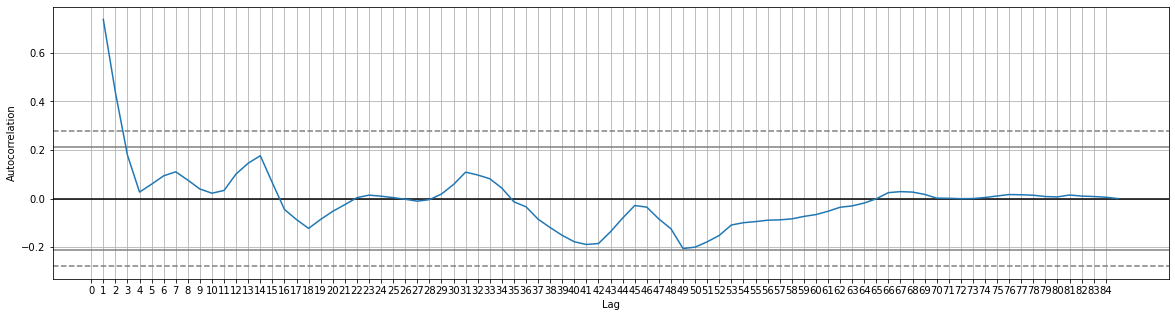

In [112]:
posDiff = np.array([i for i in np.arange(df.Date.size-1) if diff[i] > 0])
df.Open[posDiff]

fig, ax = plt.subplots(figsize=(20, 5))
ax.xaxis.set_ticks(np.arange(0,posDiff.size, 1))
pd.plotting.autocorrelation_plot(df.Close[posDiff], ax = ax)

In [91]:
diff.size

160

ConversionError: Failed to convert value(s) to axis units: array(['0', '0', '2021-01-06', '2021-01-07', '0', '0', '0', '0',
       '2021-01-14', '0', '2021-01-19', '0', '0', '0', '0', '0',
       '2021-01-27', '0', '2021-01-29', '2021-02-01', '0', '2021-02-03',
       '0', '2021-02-05', '2021-02-08', '0', '2021-02-10', '0',
       '2021-02-12', '2021-02-16', '2021-02-17', '2021-02-18', '0',
       '2021-02-22', '0', '0', '2021-02-25', '0', '2021-03-01', '0', '0',
       '0', '0', '0', '0', '2021-03-10', '0', '2021-03-12', '2021-03-15',
       '0', '2021-03-17', '2021-03-18', '2021-03-19', '2021-03-22',
       '2021-03-23', '0', '2021-03-25', '0', '0', '2021-03-30', '0',
       '2021-04-01', '2021-04-05', '2021-04-06', '2021-04-07',
       '2021-04-08', '2021-04-09', '2021-04-12', '0', '2021-04-14',
       '2021-04-15', '0', '2021-04-19', '2021-04-20', '2021-04-21', '0',
       '0', '0', '0', '2021-04-28', '2021-04-29', '2021-04-30',
       '2021-05-03', '2021-05-04', '0', '0', '2021-05-07', '0',
       '2021-05-11', '0', '2021-05-13', '0', '0', '2021-05-18', '0', '0',
       '0', '0', '0', '0', '2021-05-27', '0', '0', '2021-06-02',
       '2021-06-03', '0', '0', '0', '2021-06-09', '0', '2021-06-11',
       '2021-06-14', '0', '0', '2021-06-17', '2021-06-18', '0',
       '2021-06-22', '2021-06-23', '2021-06-24', '0', '2021-06-28', '0',
       '2021-06-30', '2021-07-01', '2021-07-02', '2021-07-06', '0',
       '2021-07-08', '2021-07-09', '2021-07-12', '2021-07-13',
       '2021-07-14', '0', '0', '0', '2021-07-20', '2021-07-21', '0', '0',
       '2021-07-26', '2021-07-27', '2021-07-28', '2021-07-29',
       '2021-07-30', '2021-08-02', '2021-08-03', '0', '2021-08-05', '0',
       '2021-08-09', '2021-08-10', '0', '0', '0', '2021-08-16',
       '2021-08-17', '2021-08-18', '0', '0'], dtype='<U11')

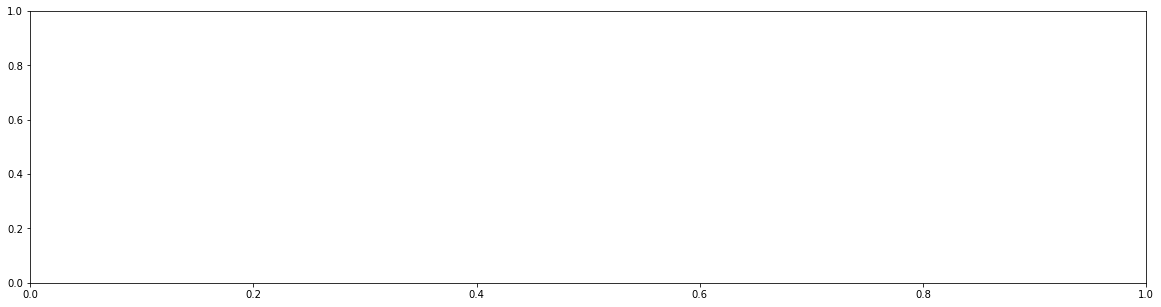

In [110]:
fig, ax = plt.subplots(figsize=(20, 5))
ax.xaxis.set_ticks(np.array([df.Date[i] if diff[i] > 0 else 0 for i in np.arange(df.Date.size-1)]))
ax.axhline(0, ls='--', linewidth=3, color='red')
#sns.lineplot(data=diff[:160], ax = ax)

<AxesSubplot:>

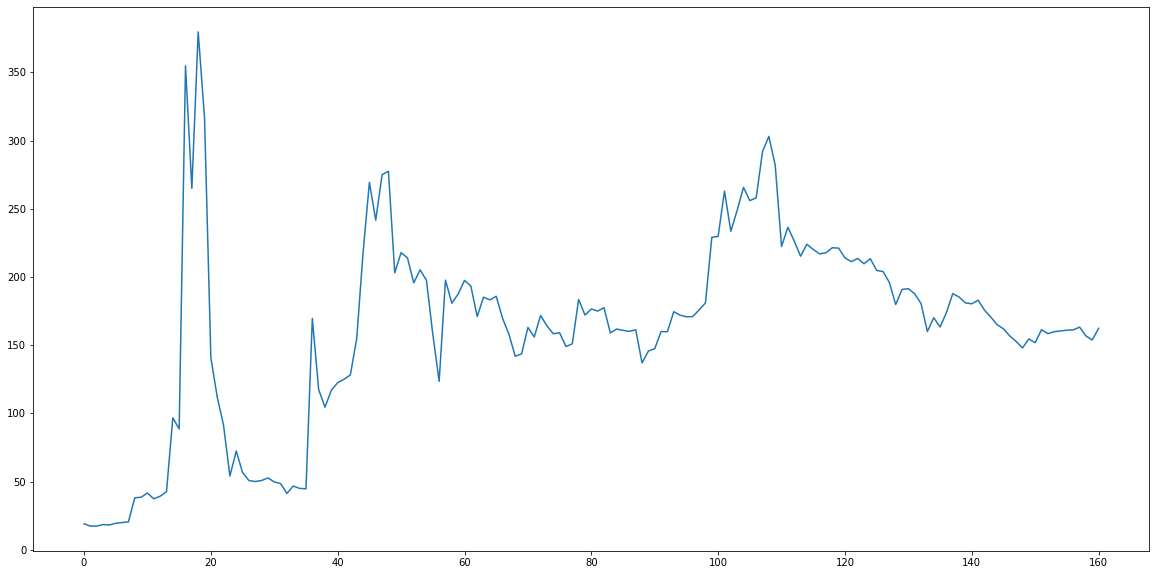

In [72]:
df.Open.plot(figsize = (20,10))